#Ramel Cary B. Jamen - 2019-2093

#Refererence:

Zhou, Victor. “Machine Learning for Beginners: An Introduction to Neural Networks - Victorzhou.com.” Victorzhou.com, 3 Mar. 2019, victorzhou.com/blog/intro-to-neural-networks/.


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df.head()

,area,bathrooms,classification
0,2104,3,1
1,1600,3,1
2,2400,3,1
3,1416,2,0
4,3000,4,0


<Axes: >

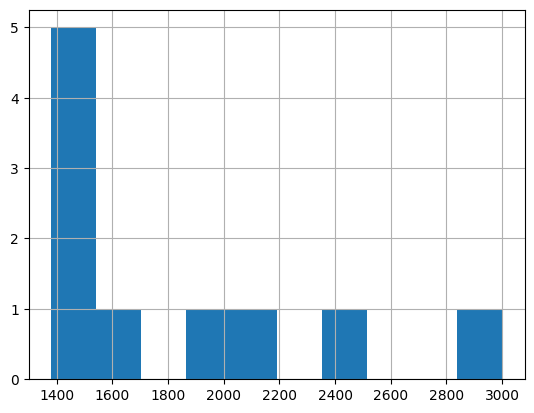

In [104]:
df.area.hist()

<Axes: >

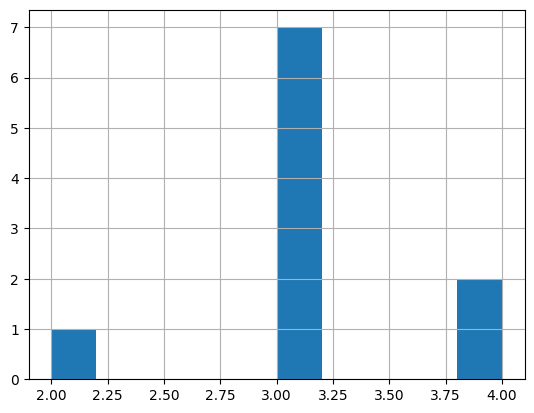

In [105]:
df.bathrooms.hist()

In [106]:
# Subtract mean of 'area' and 'bathrooms' to normalize
mean_area = df['area'].mean()
mean_bathrooms = df['bathrooms'].mean()

df['area_normalized'] = df['area'] - mean_area
df['bathrooms_normalized'] = df['bathrooms'] - mean_bathrooms
print(df)

   area  bathrooms  classification  area_normalized  bathrooms_normalized
0  2104          3               1            270.0                  -0.1
1  1600          3               1           -234.0                  -0.1
2  2400          3               1            566.0                  -0.1
3  1416          2               0           -418.0                  -1.1
4  3000          4               0           1166.0                   0.9
5  1985          4               1            151.0                   0.9
6  1534          3               0           -300.0                  -0.1
7  1427          3               1           -407.0                  -0.1
8  1380          3               1           -454.0                  -0.1
9  1494          3               1           -340.0                  -0.1


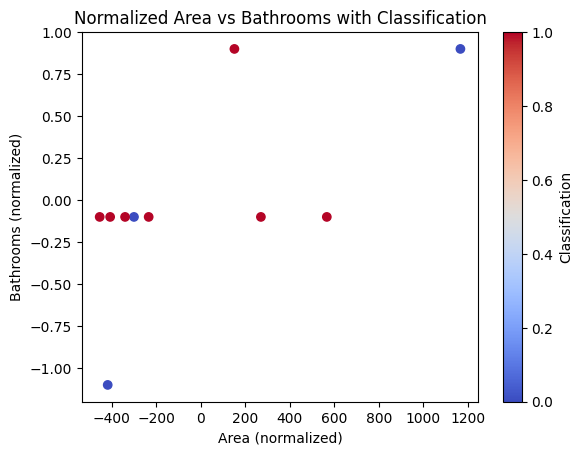

In [107]:
# Plot to visualize normalized data
plt.scatter(df['area_normalized'], df['bathrooms_normalized'], c=df['classification'], cmap='coolwarm')
plt.xlabel('Area (normalized)')
plt.ylabel('Bathrooms (normalized)')
plt.title('Normalized Area vs Bathrooms with Classification')
plt.colorbar(label='Classification')
plt.show()

In [108]:
# Extract the 'area_normalized' and 'bathrooms_normalized' columns
data = np.array([
    [270, 3],
    [-234, 3],
    [566, 3],
    [-418, 2],
    [1166, 4],
    [151, 4],
    [-300, 3],
    [-407, 3],
    [-454, 3],
    [-340, 3],
])

all_y_trues = np.array([
    1,
    1,
    1,
    0,
    0,
    1,
    0,
    1,
    1,
    1
])
# Print the results to verify
print("Data (Normalized Features):")
print(data)
print("\nAll Y Trues (Labels):")
print(all_y_trues)


Data (Normalized Features):
[[ 270    3]
 [-234    3]
 [ 566    3]
 [-418    2]
 [1166    4]
 [ 151    4]
 [-300    3]
 [-407    3]
 [-454    3]
 [-340    3]]

All Y Trues (Labels):
[1 1 1 0 0 1 0 1 1 1]


In [109]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

In [110]:
class OurNeuralNetwork:

  def __init__(self):
    self.losses = []

    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    learn_rate = 0.01
    epochs = 1000

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: p_L_p_w1 stands for "partial L partial w1"
        p_L_p_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        p_ypred_p_w5 = h1 * deriv_sigmoid(sum_o1)
        p_ypred_p_w6 = h2 * deriv_sigmoid(sum_o1)
        p_ypred_p_b3 = deriv_sigmoid(sum_o1)

        p_ypred_p_h1 = self.w5 * deriv_sigmoid(sum_o1)
        p_ypred_p_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        p_h1_p_w1 = x[0] * deriv_sigmoid(sum_h1)
        p_h1_p_w2 = x[1] * deriv_sigmoid(sum_h1)
        p_h1_p_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        p_h2_p_w3 = x[0] * deriv_sigmoid(sum_h2)
        p_h2_p_w4 = x[1] * deriv_sigmoid(sum_h2)
        p_h2_p_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_w1
        self.w2 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_w2
        self.b1 -= learn_rate * p_L_p_ypred * p_ypred_p_h1 * p_h1_p_b1

        # Neuron h2
        self.w3 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_w3
        self.w4 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_w4
        self.b2 -= learn_rate * p_L_p_ypred * p_ypred_p_h2 * p_h2_p_b2

        # Neuron o1
        self.w5 -= learn_rate * p_L_p_ypred * p_ypred_p_w5
        self.w6 -= learn_rate * p_L_p_ypred * p_ypred_p_w6
        self.b3 -= learn_rate * p_L_p_ypred * p_ypred_p_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        self.losses.append(loss)
        print("Epoch %d loss: %.3f" % (epoch, loss))

    plt.plot(range(0, epochs, 10), self.losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()


Epoch 0 loss: 0.357
Epoch 10 loss: 0.330
Epoch 20 loss: 0.304
Epoch 30 loss: 0.281
Epoch 40 loss: 0.261
Epoch 50 loss: 0.246
Epoch 60 loss: 0.235
Epoch 70 loss: 0.227
Epoch 80 loss: 0.222
Epoch 90 loss: 0.218
Epoch 100 loss: 0.216
Epoch 110 loss: 0.214
Epoch 120 loss: 0.213
Epoch 130 loss: 0.212
Epoch 140 loss: 0.211
Epoch 150 loss: 0.211
Epoch 160 loss: 0.210
Epoch 170 loss: 0.210
Epoch 180 loss: 0.210
Epoch 190 loss: 0.210
Epoch 200 loss: 0.209
Epoch 210 loss: 0.209
Epoch 220 loss: 0.209
Epoch 230 loss: 0.209
Epoch 240 loss: 0.209
Epoch 250 loss: 0.209
Epoch 260 loss: 0.209
Epoch 270 loss: 0.209
Epoch 280 loss: 0.209
Epoch 290 loss: 0.209
Epoch 300 loss: 0.209
Epoch 310 loss: 0.209
Epoch 320 loss: 0.209
Epoch 330 loss: 0.209
Epoch 340 loss: 0.209
Epoch 350 loss: 0.209
Epoch 360 loss: 0.209
Epoch 370 loss: 0.209
Epoch 380 loss: 0.209
Epoch 390 loss: 0.209
Epoch 400 loss: 0.209
Epoch 410 loss: 0.209
Epoch 420 loss: 0.209
Epoch 430 loss: 0.209
Epoch 440 loss: 0.209
Epoch 450 loss: 0.209

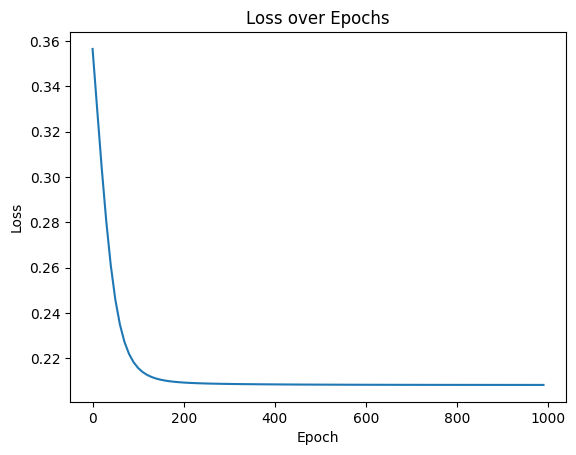

In [111]:
# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

In [113]:
# Access weights and biases
print("Weights:")
print(f"w1: {network.w1}")
print(f"w2: {network.w2}")
print(f"w3: {network.w3}")
print(f"w4: {network.w4}")
print(f"w5: {network.w5}")
print(f"w6: {network.w6}")

print("\nBiases:")
print(f"b1: {network.b1}")
print(f"b2: {network.b2}")
print(f"b3: {network.b3}")

print(f"\nLoss: {network.losses[-1]}")


Weights:
w1: 1.3652162610537102
w2: 1.0062549979882203
w3: 0.27490052677719
w4: -0.6862098660972976
w5: -0.6328193315359315
w6: 1.011336641061936

Biases:
b1: 0.5111926151007244
b2: 0.7323506359873762
b3: 0.7078712258950559

Loss: 0.2083422591334317


In [112]:
# Make some predictions
newData = np.array([1166.0, 0.9])
newData2 = np.array([-304, -.1])
print("newData: %.3f" % network.feedforward(newData))
print("newData2: %.3f" % network.feedforward(newData2))

newData: 0.748
newData2: 0.670
